In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### CACD

In [3]:
cacd_df = pd.read_csv("data/cacd/CACD_features_sex.csv")
cacd_df

,Unnamed: 0,age,identity,year,rank,lfw,birth,name,gender
0,0,53,1,2004,1,1,1951,53_Robin_Williams_0001.jpg,M
1,1,53,1,2004,1,1,1951,53_Robin_Williams_0002.jpg,M
2,2,53,1,2004,1,1,1951,53_Robin_Williams_0003.jpg,M
3,3,53,1,2004,1,1,1951,53_Robin_Williams_0004.jpg,M
4,4,53,1,2004,1,1,1951,53_Robin_Williams_0005.jpg,M
...,...,...,...,...,...,...,...,...,...
154910,163441,23,2000,2013,50,0,1990,23_Katie_Findlay_0009.jpg,F
154911,163442,23,2000,2013,50,0,1990,23_Katie_Findlay_0010.jpg,F
154912,163443,23,2000,2013,50,0,1990,23_Katie_Findlay_0011.jpg,F
154913,163444,23,2000,2013,50,0,1990,23_Katie_Findlay_0012.jpg,F


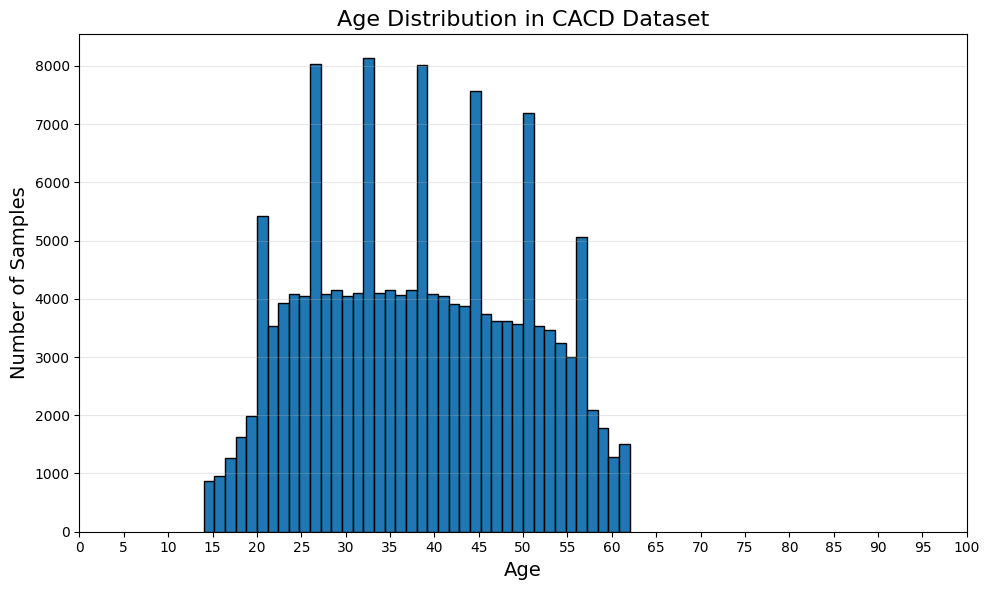

In [9]:

plt.figure(figsize=(10, 6))  
plt.hist(cacd_df['age'], bins=40, edgecolor='black')  
plt.title("Age Distribution in CACD Dataset", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Number of Samples", fontsize=14)
plt.grid(axis='y', alpha=0.3) 
plt.xticks(range(0, 101, 5))
plt.tight_layout()
plt.show()


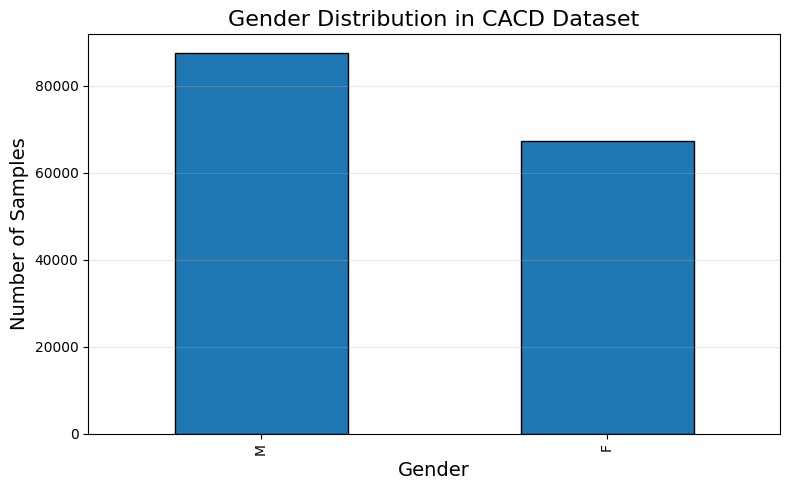

In [10]:
plt.figure(figsize=(8, 5))
cacd_df['gender'].value_counts().plot(
    kind='bar',
    edgecolor='black'
)

plt.title("Gender Distribution in CACD Dataset", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Samples", fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

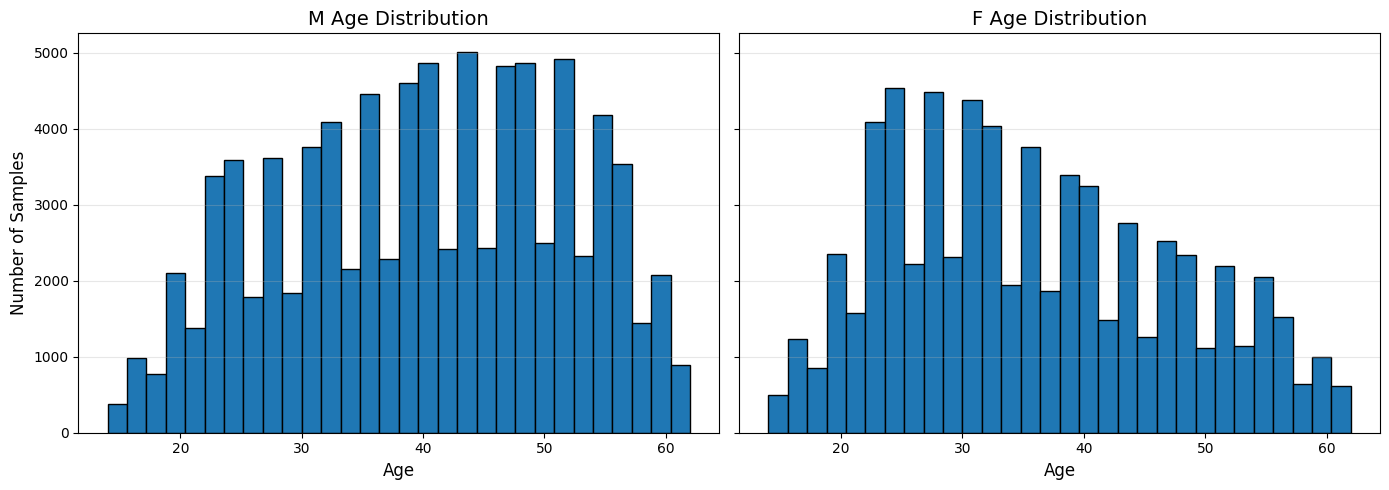

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

for ax, g in zip(axes, ['M', 'F']):
    subset = cacd_df[cacd_df['gender'] == g]
    ax.hist(
        subset['age'],
        bins=30,
        edgecolor='black'
    )
    ax.set_title(f"{g.capitalize()} Age Distribution", fontsize=14)
    ax.set_xlabel("Age", fontsize=12)
    ax.grid(axis='y', alpha=0.3)

axes[0].set_ylabel("Number of Samples", fontsize=12)
plt.tight_layout()
plt.show()


### IMDB-WIKI

In [6]:
from config import TRAIN_IMGS_FOLDER, VAL_IMGS_FOLDER

train_df = pd.read_csv(TRAIN_IMGS_FOLDER.parent / "train.csv")
val_df = pd.read_csv(VAL_IMGS_FOLDER.parent / "val.csv")

# 2. Combine them
df = pd.concat([train_df, val_df], ignore_index=True)

# 3. Create a readable label for gender (1=Male, 0=Female in IMDB-WIKI)
df['gender_label'] = df['gender'].map({1: 'Male', 0: 'Female'})

print(f"Total samples for visualization: {len(df)}")

Total samples for visualization: 181482


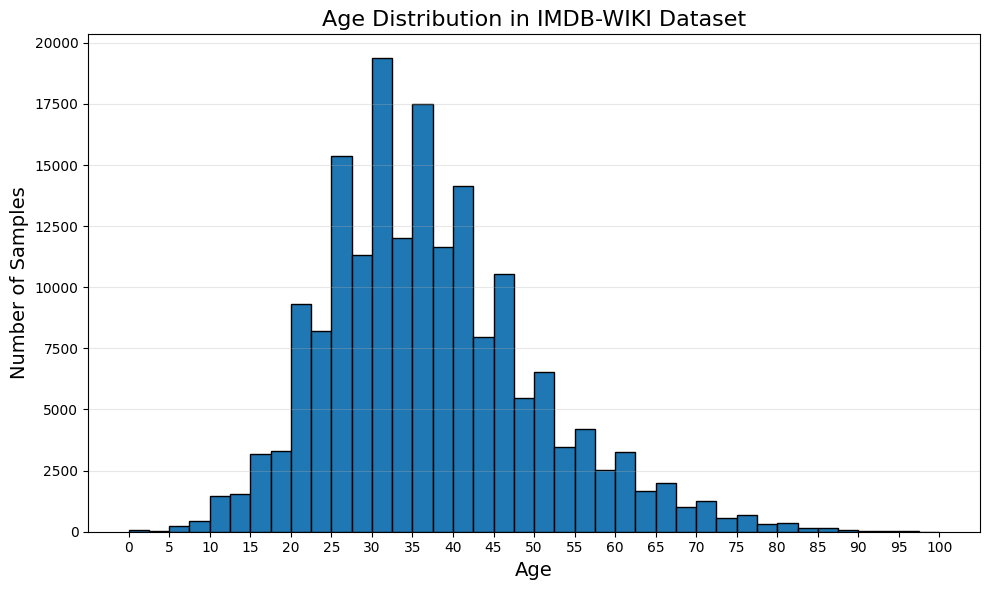

In [7]:
plt.figure(figsize=(10, 6))  
plt.hist(df['age'], bins=40, range=(0, 100), edgecolor='black')  
plt.title("Age Distribution in IMDB-WIKI Dataset", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Number of Samples", fontsize=14)
plt.grid(axis='y', alpha=0.3) 
plt.xticks(range(0, 101, 5))
plt.tight_layout()
plt.show()

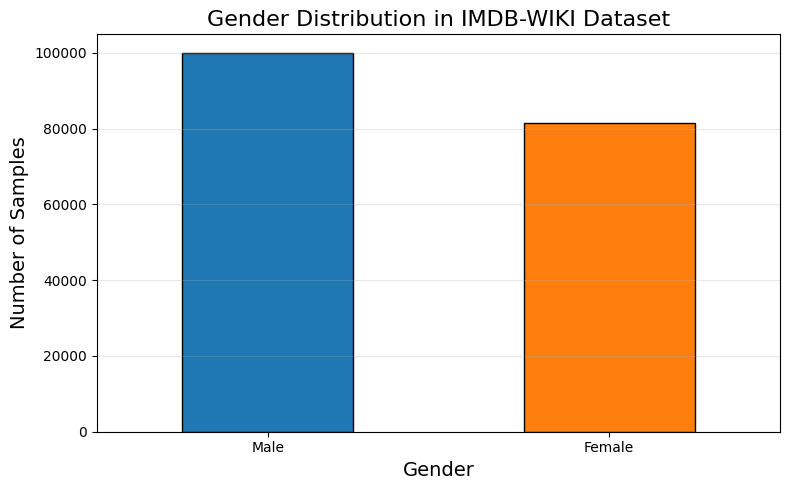

In [8]:
plt.figure(figsize=(8, 5))
# We use gender_label (Male/Female) instead of raw 0/1 integers
df['gender_label'].value_counts().plot(
    kind='bar',
    edgecolor='black',
    color=['#1f77b4', '#ff7f0e'] # Optional: Blue/Orange standard colors
)

plt.title("Gender Distribution in IMDB-WIKI Dataset", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Samples", fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0) # Keep labels horizontal
plt.tight_layout()
plt.show()

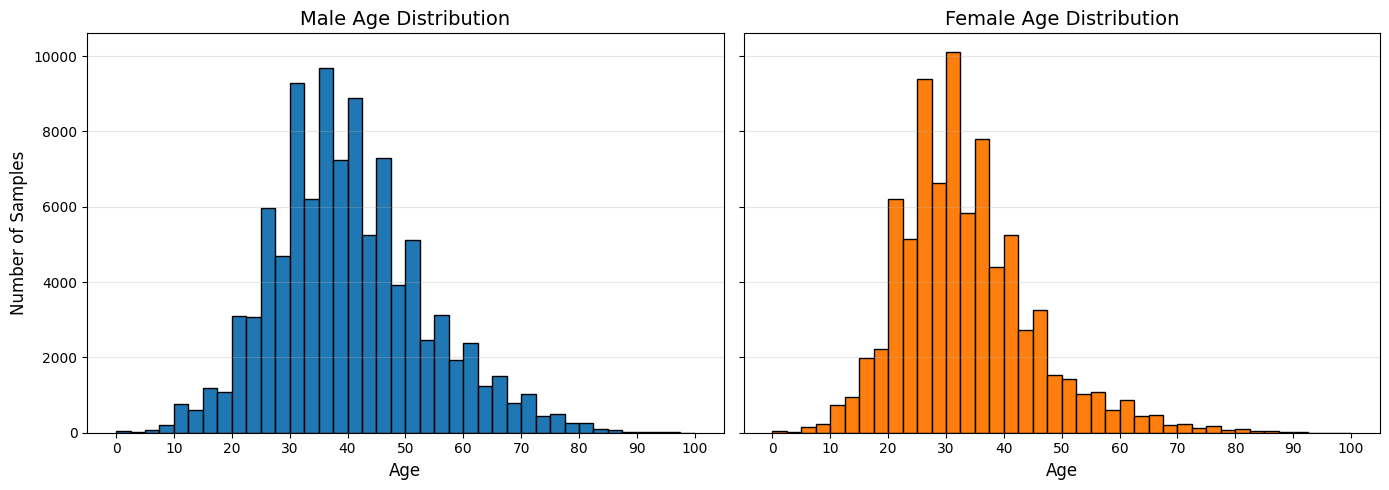

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Iterate over the readable labels
for ax, g in zip(axes, ['Male', 'Female']):
    subset = df[df['gender_label'] == g]
    ax.hist(
        subset['age'],
        bins=40,
        range=(0, 100), # Ensure both plots cover 0-100 range
        edgecolor='black',
        color='#1f77b4' if g == 'Male' else '#ff7f0e'
    )
    ax.set_title(f"{g} Age Distribution", fontsize=14)
    ax.set_xlabel("Age", fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    ax.set_xticks(range(0, 101, 10)) # Ticks every 10 years

axes[0].set_ylabel("Number of Samples", fontsize=12)
plt.tight_layout()
plt.show()